# Kings County Housing Prices Bake-off Analysis Noteook

Below I explain and go through the steps I took to come up with my model for predicting housing prices in King county, Washington. 

## Step 1: Importing Packages, Reading Data, Setting Up Initial Variable 

>In this step I import all of the packages I need thruout my process, read in my two sets, and sets list 

In [1]:
#import packages

import numpy as np
import seaborn as sns 
from geopy.distance import distance
import scipy.stats as stats
from scipy import stats 
from math import sqrt
import scipy
import pandas as pd
import sklearn 
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import linear_model 
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import pickle

plt.style.use('seaborn')
sns.set(style='darkgrid', color_codes=True)

In [8]:
#Calls data sets

hnj = pd.read_csv('Project Files/kc_house_data_train.csv')  
h= hnj.copy()

In [9]:
#Separates the columns into two variables to make it easier to do charts 
numerical = ['price','sqft_living', 'sqft_lot','sqft_above', 
             'sqft_basement','sqft_living15', 'sqft_lot15']

categorical = ['zipcode','bedrooms', 'bathrooms',
               'floors', 'waterfront', 'view', 'condition','grade','yr_built', 'yr_renovated']


## Step 2: Exploratory Data Analysis 
    
At the stage I explore all the data with visuals and dataframe outputs. 

In [10]:
#Returns the first 5 rows of the data set so that
hnj.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [11]:
#Returns a summary of all columns so that I can 
hnj.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,...,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,...,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,...,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


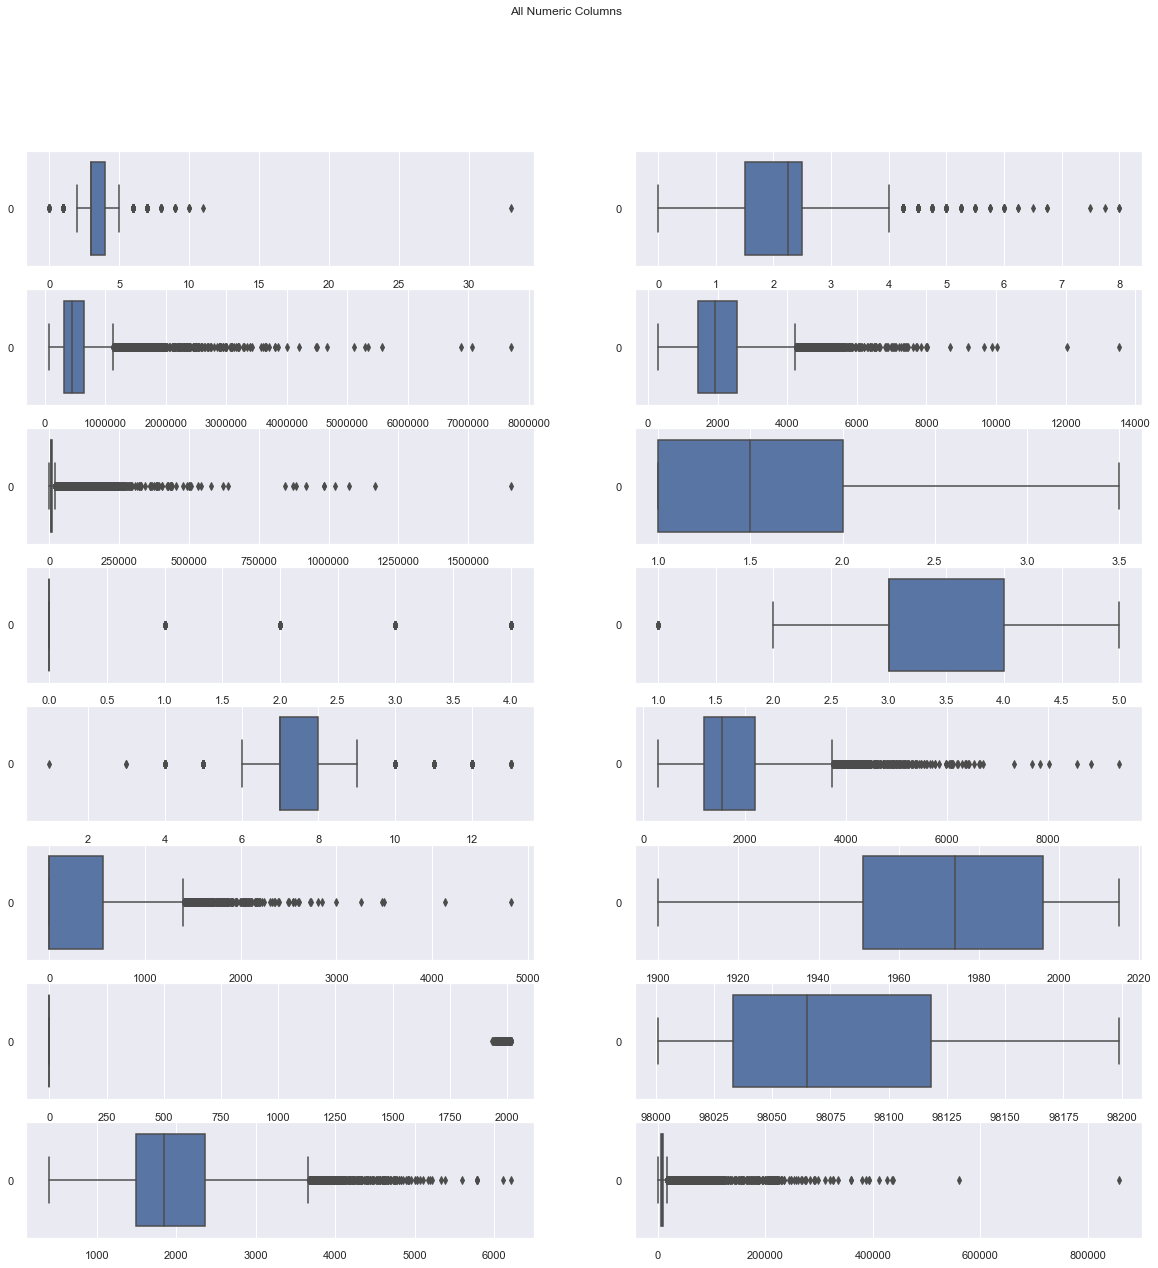

In [12]:
#Creats a boxplot of all the columns listed. 
fig, axes = plt.subplots(8,2, figsize=(20,20)) 
fig.suptitle('All Numeric Columns')

sns.boxplot(ax=axes[0, 0], data=h['bedrooms'], orient='h')
sns.boxplot(ax=axes[0, 1], data=h['bathrooms'], orient='h')

sns.boxplot(ax=axes[1, 0], data=h['price'], orient='h') 
sns.boxplot(ax=axes[1, 1], data=h['sqft_living'], orient='h') 

sns.boxplot(ax=axes[2, 0], data=h['sqft_lot'], orient='h')
sns.boxplot(ax=axes[2, 1], data=h['floors'], orient='h')

sns.boxplot(ax=axes[3, 0], data=h['view'], orient='h') 
sns.boxplot(ax=axes[3, 1], data=h['condition'], orient='h')  

sns.boxplot(ax=axes[4, 0], data=h['grade'], orient='h')
sns.boxplot(ax=axes[4, 1], data=h['sqft_above'], orient='h')

sns.boxplot(ax=axes[5, 0], data=h['sqft_basement'], orient='h') 
sns.boxplot(ax=axes[5, 1], data=h['yr_built'], orient='h') 

sns.boxplot(ax=axes[6, 0], data=h['yr_renovated'], orient='h')
sns.boxplot(ax=axes[6, 1], data=h['zipcode'], orient='h')

sns.boxplot(ax=axes[7, 0], data=h['sqft_living15'], orient='h') 
sns.boxplot(ax=axes[7, 1], data=h['sqft_lot15'], orient='h') 

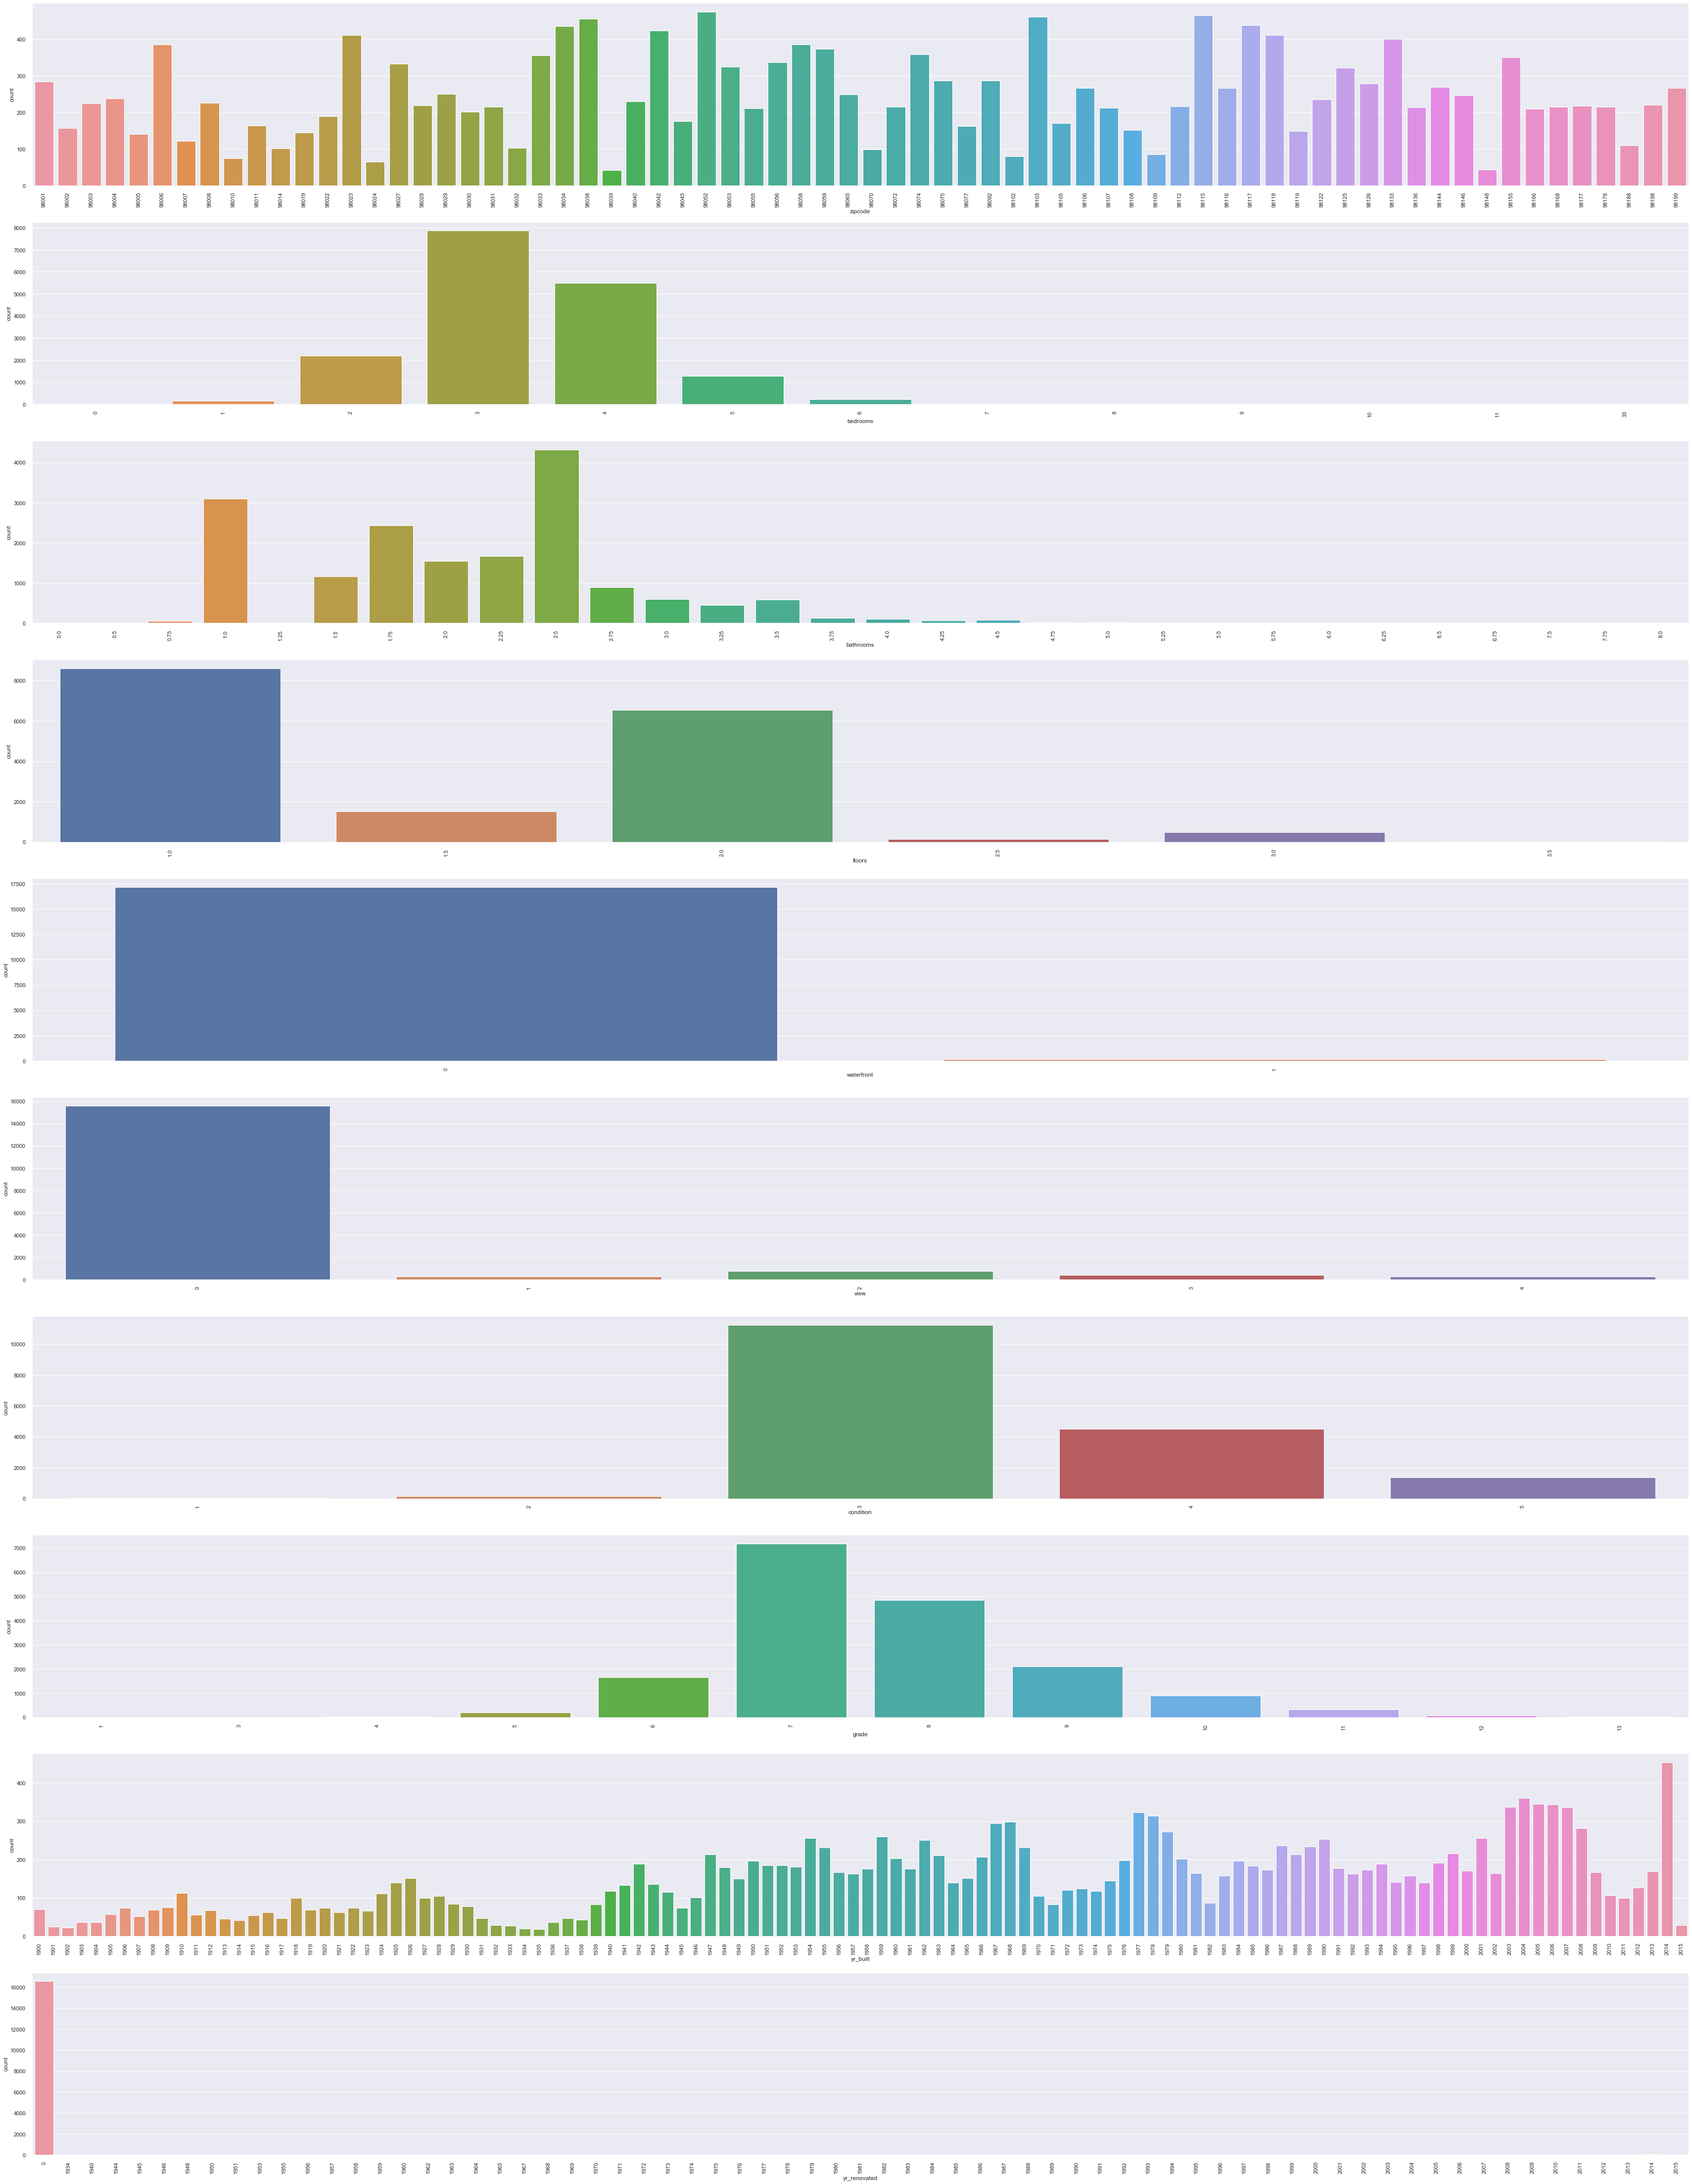

In [13]:
#Generates charts for all the catagorical columns
fig, ax = plt.subplots(10, 1, figsize=(60, 80))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(hnj[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

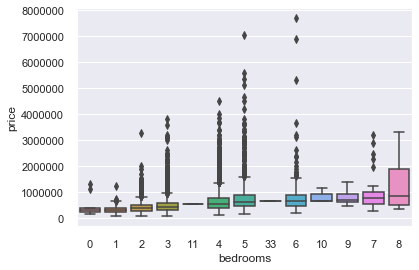

In [14]:
#The next few lines create individual charts against price. 
sorted_nb = h.groupby(['bedrooms'])['price'].median().sort_values()
sns.boxplot(x=h['bedrooms'], y=h['price'], order=list(sorted_nb.index))

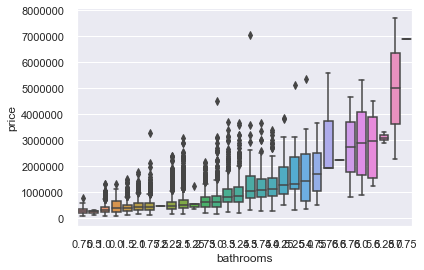

In [15]:
sorted_nb = h.groupby(['bathrooms'])['price'].median().sort_values()
sns.boxplot(x=h['bathrooms'], y=h['price'], order=list(sorted_nb.index))

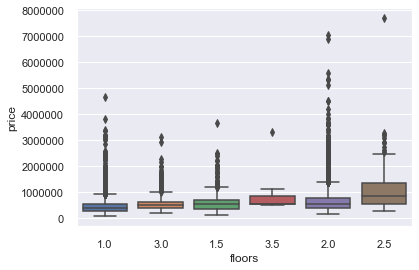

In [16]:
sorted_nb = h.groupby(['floors'])['price'].median().sort_values()
sns.boxplot(x=h['floors'], y=h['price'], order=list(sorted_nb.index))

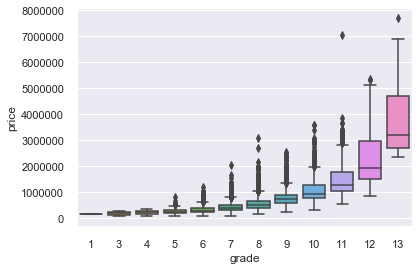

In [17]:
sorted_nb = h.groupby(['grade'])['price'].median().sort_values()
sns.boxplot(x=h['grade'], y=h['price'], order=list(sorted_nb.index))

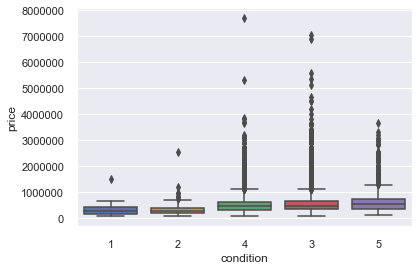

In [18]:
sorted_nb = h.groupby(['condition'])['price'].median().sort_values()
sns.boxplot(x=h['condition'], y=h['price'], order=list(sorted_nb.index))

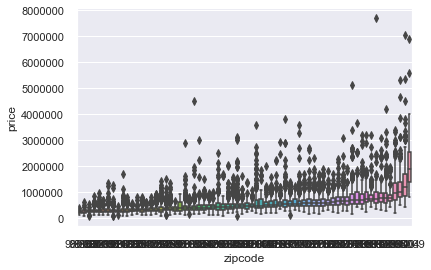

In [19]:
sorted_nb = h.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=h['zipcode'], y=h['price'], order=list(sorted_nb.index))

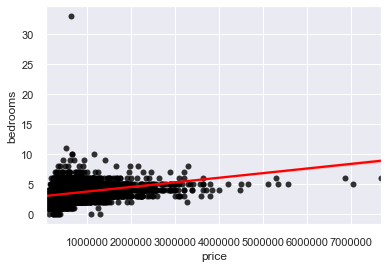

In [20]:
#Explores bedrooms against price in a way that better shows the spread of bedrooms.
sns.regplot(h['price'],h['bedrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [21]:
#Here I list the correlation of all the initial columns to get make my final decisions about what to in terms of columns
price_corr = hnj[hnj.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

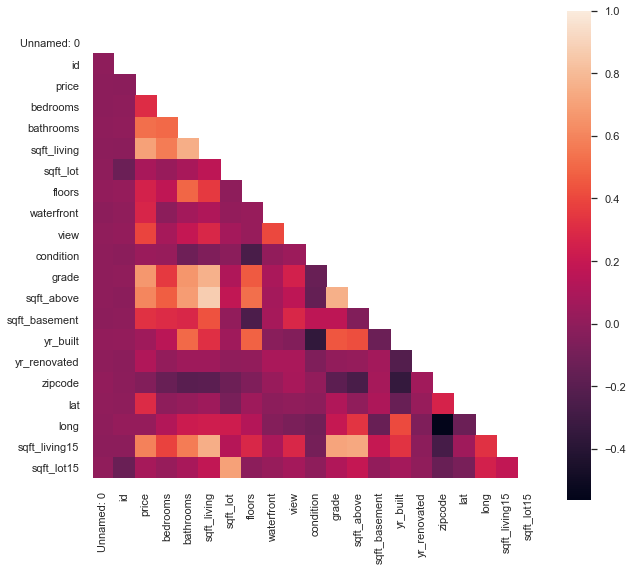

In [23]:
#Display the above information as a heatmap 
plt.style.use('seaborn')
sns.set(style="white") 


f, ax = plt.subplots(figsize=(10, 9))

mask = np.zeros_like(hnj.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(hnj.corr(), mask=mask, square=True)
b, t = plt.ylim() 
b += .5
t -= .5 
plt.ylim(b, t) 
plt.show() 

## Step 3: Clean up the data 

Having looked at the visuals, I have noted multiple columns that require capping for extreme, accounting for errors, and other such transformations.

In [24]:
#Creates variable list tranform thruout
prelim_feat = ['zipcode', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 'sqft_above', 
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long'] 

test_feat = ['zipcode', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 'sqft_above', 
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long'] 


hnj1 = hnj[test_feat] 
target = 'price'

In [25]:
hnj2 = hnj.copy() #creates a copy of my dataframe

In [26]:
#Drops unneeded columns
def drop_uneeded_columns(df): 
    unwanted_columns_lists= ['Unnamed: 0', 'id', 'date',
                             'sqft_living15', 'sqft_lot15'] 
    for c in unwanted_columns_lists: 
        del df[c] 

In [27]:
drop_uneeded_columns(hnj2) #runs the previous function

In [28]:
#Creates Test to check features
def model_test(df, features, target): 
    target = df[target]
    df_feature = df[features]
    X_train, X_test, y_train, y_test = train_test_split(df_feature, target, random_state=34,test_size=0.2)
    lm = linear_model.LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train) 
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_pred = lm.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))     

In [29]:
model_test(hnj2, test_feat, target)#runs the above test 

Training:  203869 vs. Testing:  211470


In [30]:
hnj3 = hnj2.copy() #creates a copy of the data set 

In [31]:
#This function caps bedrooms and bathrooms 
def cap_ba_bd(row):
    if row['bedrooms'] > 11:
        row['bedrooms'] = 3 #column average
    if row['bedrooms'] > 9:
        row['bedrooms'] = 10
    if row['bathrooms'] < 1:
        row['bathrooms'] = 1
    return row 

In [32]:
hnj3.apply(cap_ba_bd, axis = 1) #applies the previous function

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,365000.0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162
1,865000.0,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285
2,1038000.0,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129
3,1490000.0,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228
4,711000.0,3.0,2.50,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5.0,2.50,3240.0,9960.0,1.0,0.0,1.0,3.0,8.0,2020.0,1220.0,1958.0,0.0,98008.0,47.5858,-122.112
17286,440000.0,2.0,1.75,1300.0,4000.0,2.0,0.0,0.0,3.0,7.0,1300.0,0.0,1948.0,0.0,98105.0,47.6687,-122.288
17287,310000.0,3.0,1.00,1050.0,9876.0,1.0,0.0,0.0,3.0,7.0,1050.0,0.0,1953.0,0.0,98028.0,47.7635,-122.262
17288,427500.0,3.0,1.50,1900.0,43186.0,1.5,0.0,0.0,4.0,7.0,1300.0,600.0,1971.0,0.0,98038.0,47.4199,-121.990


In [33]:
model_test(hnj3, test_feat, target) #runs the model test 

Training:  203869 vs. Testing:  211470


In [34]:
clean_data = hnj3.copy() #creates a copy my data frame

## Step 4: Created new features.

At this stage I will create new features based off of what seems worth looking into from the visuals.

In [35]:
#Calculates the distance to a popular park in seattle and creates the column 
clean_data['distance_to_gas_works'] = np.nan
def dist_to_gas_work(row): 
    gas_works_park = (47.6456, -122.3344) 
    coord = (row['lat'], row['long']) 
    dist = distance(gas_works_park, coord).miles 
    row['distance_to_gas_works'] = (round((dist), 2))
    return row 

clean_data = clean_data.apply(dist_to_gas_work, axis = 1)

In [36]:
#Calculates the ratio of bedrooms to bathrooms
clean_data['bath_to_bed'] = np.nan
def b_b_column(row): 
    if row['bedrooms'] == 0: 
         bath_bed = row['bathrooms']/1
    else:
        bath_bed = row['bathrooms']/row['bedrooms'] 
    ratio_ab = abs(bath_bed) 
    row['bath_to_bed'] = ratio_ab 
    return row 
clean_data = clean_data.apply(b_b_column, axis = 1)

In [37]:
#Creates a binary column that denotes whether a home has the golden ratio (or is within 10% of it)
clean_data['golden_ratio'] = np.nan
def golden_ratio(row): 
    golden_ratio = 2/3
    golden_ratio_u = golden_ratio + (golden_ratio*.10) 
    golden_ratio_l = golden_ratio - (golden_ratio*.10) 
    if row['bath_to_bed'] >= golden_ratio_l:
        if row['bath_to_bed'] <= golden_ratio_u: 
            row['golden_ratio'] = 1  
        else: 
            row['golden_ratio'] = 0 
    else: 
        row['golden_ratio'] = 0 
    return row 

clean_data = clean_data.apply(golden_ratio, axis = 1)

In [38]:
#Creates a populates a sqft living to lot ration 
clean_data['sqft_li_to_sqft_lo'] = np.nan
def li_lo_column(row): 
    living__to_lot = row['sqft_living']/row['sqft_lot']
    ratio_ab = abs(living__to_lot) 
    row['sqft_li_to_sqft_lo'] = ratio_ab 
    return row  
clean_data = clean_data.apply(li_lo_column, axis = 1)

In [39]:
#Creates and populates a new row tha combine grade and condition while slightly weighing grade by 25%
clean_data['score'] = np.nan
def grade_n_cond(row): 
    new_grade = row['grade']*1.25
    score = new_grade + row['condition']
    row['score'] = score 
    return row 
clean_data = clean_data.apply(grade_n_cond, axis = 1)

In [40]:
#Creates and populates a new column that shows when the house was last changed whether it was when it was built or renovated
clean_data['year_updated'] = np.nan
def year_changed(row): 
    if row['yr_renovated'] > 1:
        row['year_updated'] = row['yr_renovated']  
    else: 
        row['year_updated'] = row['yr_built']
    return row 
clean_data = clean_data.apply(year_changed, axis = 1)

In [41]:
#Creates a binary based on whether or not a home has a basement by noting if it includes a number in higher zero in the sqft_basement column
clean_data['basement'] = clean_data['sqft_basement'].map(lambda x : 1 if x != 0 else 0) 

In [42]:
#Catagorizes homes by number of bedrooms 
clean_data['home_category'] = np.nan
def home_cat(row): 
    if row['bedrooms'] < 2:
        row['home_category'] = 'starter'  
    elif row['bedrooms'] < 5: 
        row['home_category'] = 'small_family' 
    elif row['bedrooms'] < 9: 
        row['home_category'] = 'large_family'
    else:
        row['bedrooms'] >= 9
        row['home_category'] = 'mansion'
    return row 
clean_data = clean_data.apply(home_cat, axis = 1)

In [43]:
#Catagorizes home based on score 
clean_data['score_cat'] = np.nan
def score_cat(row): 
    if row['score'] <= 11.5:
        row['score_cat'] = 'low'  
    elif row['score'] <= 12: 
        row['score_cat'] = 'low_mid' 
    elif row['score'] <= 13: 
        row['score_cat'] = 'high_mid'
    else:
        row['score_cat'] = 'high_end'
    return row 
clean_data = clean_data.apply(score_cat, axis = 1)

In [44]:
#Calculates the last year updated from either year built or year renovated and populates it
clean_data['years_since_updated'] = np.nan
def years_old(row):  
    age = 2021 - row['year_updated'] 
    if age < 1: 
        row['years_since_updated'] = 1 
    else: 
        row['years_since_updated'] = age
    return row 
clean_data = clean_data.apply(years_old, axis = 1)

In [45]:
#Test the model once again 
test_feat = ['zipcode', 'bedrooms', 'bathrooms', 'years_since_updated',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'distance_to_gas_works', 'bath_to_bed', 
            'golden_ratio', 'sqft_li_to_sqft_lo','score','year_updated','basement'] 

model_test(clean_data, test_feat, target)

Training:  188836 vs. Testing:  198174


In [46]:
clean_data2 = clean_data.copy()

In [47]:
#drop columns that are no longer needed because new features have been created
def drop_uneeded_columns2(df): 
    unwanted_columns_lists= ['condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'long', 'lat'] 
    for c in unwanted_columns_lists: 
        del df[c]  
drop_uneeded_columns2(clean_data2)        

### 4.1) Dummy features 
Having created simple features I will now start more complex features with dummy variables.

In [48]:
#creates a copy of the dataset to work from 
pf_data = clean_data2.copy()

In [49]:
test_feat = ['zipcode', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 
             'view','distance_to_gas_works', 'bath_to_bed', 'years_since_updated',
            'golden_ratio', 'sqft_li_to_sqft_lo','score','year_updated','basement'] 

model_test(pf_data, test_feat, target)

Training:  194145 vs. Testing:  204797


In [50]:
#Turns out home category into dummy variables and drops the original column
pf_data = pd.concat([pf_data, pd.get_dummies(pf_data['home_category'])], 1) 
pf_data = pf_data.drop(columns = 'home_category') 

#Turns our score categories into dummy variables and drops the original column
pf_data = pd.concat([pf_data, pd.get_dummies(pf_data['score_cat'])], 1)   
pf_data = pf_data.drop(columns = 'score_cat') 

#Turns zipcodes into dummy variables and drops original columns
pf_data = pd.concat([pf_data, pd.get_dummies(pf_data['zipcode'])], 1)  
pf_data = pf_data.drop(columns = 'zipcode')

In [51]:
test_feat=  [ 'years_since_updated',
                                 
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                 'score',
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0] 



model_test(pf_data, test_feat, target)

Training:  156620 vs. Testing:  164606


### 4.2) Non linear variable 
I now move on to non- linear creations.

In [52]:
pf_data2 = pf_data.copy()

In [53]:
#Creates polynomial features 
pf_data2['sqft_li_to_sqft_lo_score'] = pf_data2['score'] * pf_data2['sqft_li_to_sqft_lo'] 
pf_data2['score^2'] = pf_data2['score'] * pf_data2['score'] 

In [54]:
column_test = [ 'years_since_updated',                
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                 'score',
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0, 
              'sqft_li_to_sqft_lo_score',                         'score^2',
                        ] 

model_test(pf_data2, column_test, 'price') 

Training:  150786 vs. Testing:  159576


In [55]:
pf_data3 = pf_data2.copy()

### 4.3) Creating interactions 
Becuase these will affect my split testing I will handle these separely here

In [56]:
all_feats = pf_data3.copy()

In [57]:
#Creates interaction between sqft_living and basement binary value

all_feats['s_b_b'] = all_feats['basement'] * all_feats['sqft_living'] 

#Creates interaction between waterfront and sqft_living

all_feats['w_b_s'] = all_feats['waterfront'] * all_feats['sqft_living']

In [58]:
feat_test =  [ 'years_since_updated',  's_b_b','w_b_s',              
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                 'score',
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0, 
              'sqft_li_to_sqft_lo_score',                         'score^2',
                        ] 
 

model_test(all_feats, feat_test, target)  

Training:  143469 vs. Testing:  156381


## Step 5: Train-Test Splitting

Now that I have all the features I want to test I am ready to begin testing.

In [99]:
#First I will create my list of non scaled features

af_list =  [ 'years_since_updated',  's_b_b','w_b_s',              
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0, 
              'sqft_li_to_sqft_lo_score',                         'score^2',
                        ]   

s_feats = ['sqft_li_to_sqft_lo_score', 'score^2', 'years_since_updated',  's_b_b','w_b_s',              
            'bedrooms','bathrooms','sqft_living','sqft_lot', 'distance_to_gas_works',
            'bath_to_bed','golden_ratio','sqft_li_to_sqft_lo' ] 



target = all_feats['price']

In [100]:
#Split the data for the split test
x_train, x_test, y_train, y_test = train_test_split(all_feats, target, random_state=3,test_size=0.2)

In [101]:
#sets the scaler
scaler = StandardScaler()

# fits the scaler to the training data
scaler.fit(x_train[s_feats])

#transforms the training data
scaled_data = scaler.transform(x_train[s_feats])

In [102]:
#creates dataframe
x_train_scaled = pd.DataFrame(data=scaled_data, columns=s_feats,index=x_train.index) 

In [103]:
#creates a list of the feature that were not scaled
not_scaled = [x for x in af_list if x not in s_feats] 

In [104]:
#uses previous function to put together the data frame 
x_train = pd.concat([x_train_scaled, x_train[not_scaled]], axis=1)

In [105]:
#transform the training data
scaled_data = scaler.transform(x_test[s_feats])

#create dataframe
x_test_scaled = pd.DataFrame(data=scaled_data, columns=s_feats, index=x_test.index)


In [106]:
#uses previous function to put together the data frame 
x_test = pd.concat([x_test_scaled, x_test[not_scaled]], axis=1)

In [107]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(x_train, y_train)

#Prints the y-intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

1.4683925592175987e+17
[ 2.09966447e+05  1.27124383e+05 -2.14300481e+15  3.25518175e+04
  1.00910779e+05 -3.91316648e+04  5.98269524e+04  1.39084780e+05
  8.35951091e+03 -8.43651875e+04 -3.72552500e+04 -7.14490625e+03
 -2.30166500e+05 -4.03968750e+03 -3.05311102e+05  4.94625938e+04
 -7.45250793e+13 -8.31428750e+04  4.59016610e+13  4.59016609e+13
  4.59016610e+13  4.59016611e+13  1.71685869e+14  1.71685869e+14
  1.71685869e+14  1.71685869e+14 -2.07884520e+12 -2.07884518e+12
 -2.07884521e+12 -2.07884460e+12 -2.07884506e+12 -2.07884508e+12
 -2.07884509e+12 -2.07884508e+12 -2.07884511e+12 -2.07884520e+12
 -2.07884511e+12 -2.07884516e+12 -2.07884509e+12 -2.07884523e+12
 -2.07884506e+12 -2.07884509e+12 -2.07884522e+12 -2.07884504e+12
 -2.07884523e+12 -2.07884524e+12 -2.07884524e+12 -2.07884502e+12
 -2.07884516e+12 -2.07884516e+12 -2.07884408e+12 -2.07884491e+12
 -2.07884520e+12 -2.07884504e+12 -2.07884508e+12 -2.07884507e+12
 -2.07884524e+12 -2.07884523e+12 -2.07884524e+12 -2.07884520e+12
 -

In [108]:
#set the predictions to variables
y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)

In [109]:
#Returns RMSE value
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 146157.5433309792
Testing Root Mean Squared Error: 155551.11794644906


In [110]:
#Prints the performance fo this project
print('Perfomance : {} %'.format(round(abs((test_rmse-train_rmse)/train_rmse)*100)))

Perfomance : 6 %


## Step 6: Feature selection 
Now that I am satisfied with my split testing I will move on to feacture selection starting with performing a couple of hypothesis test on my simpler featueres.

In [111]:
#Hypothesis testing basement column 

has_base = all_feats[(all_feats['basement'] == 1)] 
base_price = has_base.price
no_base = all_feats[(all_feats['basement'] == 0)]   
nob_price = no_base.price

scipy.stats.ttest_ind(base_price,nob_price) 

Ttest_indResult(statistic=23.64189256331611, pvalue=1.2107663322174255e-121)

In [112]:
print('Based off of this test statistic, I would reject the null hypothesis.')

Based off of this test statistic, I would reject the null hypothesis.


In [113]:
#Hypothesis testing golden ratio column 

has_gr = all_feats[(all_feats['golden_ratio'] == 1)] 
gr_price = has_gr.price
has_gr = all_feats[(all_feats['golden_ratio'] == 0)]   
nogr_price = has_gr.price

scipy.stats.ttest_ind(gr_price,nogr_price) 


Ttest_indResult(statistic=10.653779530256454, pvalue=2.0220641399300563e-26)

In [114]:
print('Based off of this test statistic, I would reject the null hypothesis.')

Based off of this test statistic, I would reject the null hypothesis.


In [115]:
#Hypothesis testing waterfront column 

is_waterfront = all_feats[(all_feats['waterfront'] == 1)] 
waterfront_price = is_waterfront.price
no_waterfront = all_feats[(all_feats['waterfront'] == 0)]   
notw_price = no_waterfront.price

scipy.stats.ttest_ind(waterfront_price,notw_price) 


Ttest_indResult(statistic=37.72330429549608, pvalue=2.465038317654299e-299)

In [116]:
print('Based off of this test statistic, I would reject the null hypothesis.')

Based off of this test statistic, I would reject the null hypothesis.


In [117]:
#Anova test on the home category makes a difference
alpha = 0.05 
formula = 'price~home_category'
lm_condition = smf.ols(formula, clean_data2).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The home category has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The home category has a statistically significant impact on average property value
Conditions F-statisic Probability:  5.969633290958834e-192


In [118]:
#Performs an ANOVA test on my score category
formula = 'price~score_cat'
lm_condition = smf.ols(formula, clean_data2).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The score category has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The score category has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


### 6.1) Correlation Testing

In [119]:
#Diplays correlation against price with the new columns
price_corr = all_feats[all_feats.columns[:]].corr()['price'][:] 
price_corr

price                       1.000000
bedrooms                    0.305106
bathrooms                   0.524335
sqft_living                 0.703540
sqft_lot                    0.086803
                              ...   
98199.0                     0.082508
sqft_li_to_sqft_lo_score    0.205892
score^2                     0.685691
s_b_b                       0.413924
w_b_s                       0.354563
Name: price, Length: 98, dtype: float64

In [120]:
#Prints my r-squared score
print ("R^2 Score:", lm.score(x_train, y_train))

R^2 Score: 0.8468106319427414


In [121]:
c = x_train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so[1360:1420]

98133.0                98039.0                  0.007621
98039.0                98133.0                  0.007621
98032.0                98105.0                  0.007627
98105.0                98032.0                  0.007627
98032.0                starter                  0.007627
starter                98032.0                  0.007627
98032.0                98002.0                  0.007627
98002.0                98032.0                  0.007627
large_family           98077.0                  0.007629
98077.0                large_family             0.007629
98102.0                98177.0                  0.007635
98177.0                98102.0                  0.007635
98122.0                98010.0                  0.007641
98010.0                98122.0                  0.007641
98007.0                98005.0                  0.007648
98005.0                98007.0                  0.007648
98010.0                98003.0                  0.007662
98003.0                98010.0 

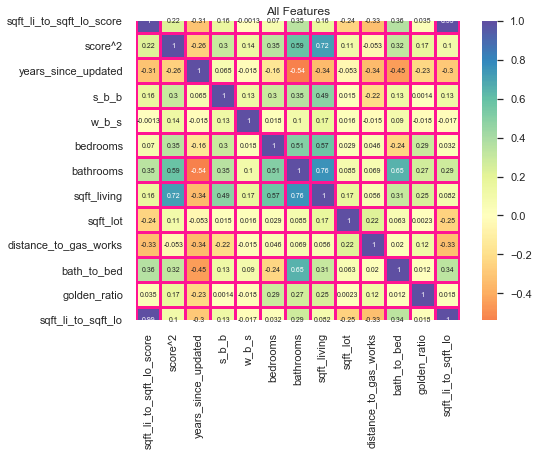

In [214]:
#Creates a heatmap of all of my scaled columns

sns.set_context(context="notebook", font_scale=1, rc=None)
af_corr = all_feats[s_feats].corr()
plt.title("All Features", fontsize =12)
sns.heatmap(af_corr, square=True, annot=True, annot_kws={"fontsize":7}, fmt='.2g', center= 0, cmap= 'Spectral', linewidths=2, linecolor={'deeppink'}, ) 
plt.show()

### 6.1)Perform F-Test 
The next few steps goes thru proecess of performing an F-test.

In [130]:
#Crates a selector based on f regression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(x_train, y_train) 

selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [124]:
#Sets the removed and selected columns to variables
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [131]:
#Sets the removed columns to a variable 
sugg =list(removed_columns) 

In [132]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(x_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(x_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(x_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 162769.91602010693
Testing Root Mean Squared Error: 170187.79821260375


In [133]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  155551.11794644906 
 KBest:    170187.79821260375 



### 6.1)Perform Wrapper Test

In [139]:
#The next few lines peform a wrapper test
from sklearn.feature_selection import RFECV

In [140]:
ols = linear_model.LinearRegression()

In [145]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(x_train, y_train) 

selected_rfe = x_train.columns[selector.support_]
removed_rfe = x_train.columns[~selector.support_]

In [146]:
removed_rfe

Index([], dtype='object')

In [147]:
selected_rfe

Index(['sqft_li_to_sqft_lo_score',                  'score^2',
            'years_since_updated',                    's_b_b',
                          'w_b_s',                 'bedrooms',
                      'bathrooms',              'sqft_living',
                       'sqft_lot',    'distance_to_gas_works',
                    'bath_to_bed',             'golden_ratio',
             'sqft_li_to_sqft_lo',                   'floors',
                     'waterfront',                     'view',
                   'year_updated',                 'basement',
                   'large_family',                  'mansion',
                   'small_family',                  'starter',
                       'high_end',                 'high_mid',
                            'low',                  'low_mid',
                          98001.0,                    98002.0,
                          98003.0,                    98004.0,
                          98005.0,                    9

In [148]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(x_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(x_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(x_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 146157.5433309792
Testing Root Mean Squared Error: 155551.11794644906


In [149]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  155551.11794644906 
 KBest:    170187.79821260375 
 RFE:      155551.11794644906


## Step 7: Adjusting and choosing a model. 

So now that I have tested it seems all my variables are useful. Nevertheless I will be removing the duplicates cause by my poly features and re running my test. For the sake of ease I will do this by temporarily call altered set by the same name as the one I previously tested.

## Step 8:  Refit your best model to the entire dataset.

In [150]:
#Runs a linear regression to fit my model
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(all_feats, target)

In [152]:
#displays the coefficient for my model
lm.coef_

array([ 1.00000000e+00, -6.95752502e-12,  6.53281724e-12, -1.99628668e-14,
       -1.34727250e-17,  3.55092163e-11, -1.25723801e-10,  4.22356571e-12,
        2.21084073e-14,  1.09015127e-12,  7.45934528e-13,  1.98151565e-11,
       -4.28759615e-12, -3.87154919e-15, -1.12963985e-12,  3.87154153e-15,
       -1.12952828e-14,  3.16843896e-12, -1.00341148e-12, -2.15373220e-12,
       -5.96874818e-13,  8.88043033e-13, -1.06161914e-12,  7.70450922e-13,
        1.22328981e-13,  1.37540638e-12,  6.89490039e-13,  7.45366631e-13,
       -7.02800034e-13,  3.87115902e-13,  8.48720875e-12,  4.50280891e-13,
        7.88129359e-13, -1.60349466e-13, -9.45203711e-13, -1.72787851e-13,
        1.46357385e-12,  1.23535405e-12,  1.52664429e-12, -9.91689547e-13,
       -1.27567236e-13,  7.57600932e-13,  2.88394209e-12,  1.16896643e-11,
        8.32656433e-13,  1.91026436e-12, -2.42089864e-12,  2.32778774e-13,
       -1.36167646e-11, -2.25644806e-12,  7.03678639e-14, -1.02981420e-12,
        9.50119640e-13, -

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
#I used this function to create my pickle of my model and scaler
def scale_fit_pickle_origin(df_features, target):
    scaler = StandardScaler()
    scaler.fit(df_features)
    scaled_data = scaler.transform(df_features)
    df_features_scaled = pd.DataFrame(data=scaled_data, columns=df_features.columns, index=df_features.index)
    lm_final = LinearRegression()
    lm_final = lm_final.fit(df_features, target)
    pickle_out = open("model.pickle","wb")
    pickle.dump(lm_final, pickle_out)
    pickle_out.close()
    pickle_out = open('scaler.pickle', "wb")
    pickle.dump(scaler, pickle_out)
    pickle_out.close()
    return print(' Your scaler and model files have now been created')

In [153]:
df = all_feats[af_list]  
df 

,years_since_updated,s_b_b,w_b_s,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0,sqft_li_to_sqft_lo_score,score^2
0,35.0,0.0,0.0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3.258743,196.0000
1,44.0,2900.0,0.0,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.463596,225.0000
2,24.0,0.0,0.0,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,5.797072,280.5625
3,31.0,0.0,0.0,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,5.618839,324.0000
4,17.0,0.0,0.0,3.0,2.50,2550.0,5376.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.759208,203.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,63.0,3240.0,0.0,5.0,2.50,3240.0,9960.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,4.228916,169.0000
17286,73.0,0.0,0.0,2.0,1.75,1300.0,4000.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3.818750,138.0625
17287,68.0,0.0,0.0,3.0,1.00,1050.0,9876.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.249241,138.0625
17288,50.0,1900.0,0.0,3.0,1.50,1900.0,43186.0,1.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0.560946,162.5625


In [154]:
scale_fit_pickle_origin(df, target)

NameError: name 'scale_fit_pickle_origin' is not defined